In [287]:
# Pandas DataFrame row/column Add/Append/Insert Functions
# Byunggu ("Dan") Yu
# 2021-10-21


import numpy as np
import pandas as pd
import time
import datetime as datetime

In [288]:
# DataFrame creation from rows

r1=[1,2,3,4]
r2=[5,6,7,8]
r3=['a','b','c','d']
r4=['e','f','g','h']
idx1=[0,1,2,3]
idx2=[4,5,6,7]

df=pd.DataFrame([r1,r2,r3,r4,idx1,idx2])
df

0  1  2  3
0  1  2  3  4
1  5  6  7  8
2  a  b  c  d
3  e  f  g  h
4  0  1  2  3
5  4  5  6  7

In [289]:
# Rotating a DataFrame (transpose)

df=df.T
df

0  1  2  3  4  5
0  1  5  a  e  0  4
1  2  6  b  f  1  5
2  3  7  c  g  2  6
3  4  8  d  h  3  7

In [290]:
# Using existing columns as the index

df.set_index([3,4],inplace=True)
df.index.names=['idx1','idx2']
df.columns=['col1','col2','col3','col4']
df.columns.names=['columns']
df

columns   col1 col2 col3 col4
idx1 idx2                    
e    0       1    5    a    4
f    1       2    6    b    5
g    2       3    7    c    6
h    3       4    8    d    7

In [291]:
# Reset Index

df.reset_index(drop=True, inplace=True)
df

columns col1 col2 col3 col4
0          1    5    a    4
1          2    6    b    5
2          3    7    c    6
3          4    8    d    7

In [292]:
# Setting the names of single-level index and columns

idx=pd.Index([0,1,2,3],name='index')
cols=pd.Index(['a','b','c','d'],name='columns')
df.index=idx
df.columns=cols
df

columns  a  b  c  d
index              
0        1  5  a  4
1        2  6  b  5
2        3  7  c  6
3        4  8  d  7

In [293]:
# Setting the names of multi-level index and columns

idx=pd.MultiIndex.from_tuples([(0,0),(0,1),(1,0),(1,1)],names=['index 1', 'index 2'])
cols=pd.MultiIndex.from_tuples([('a','c1'),('a','c2'),('b','c1'),('b','c2')], names=['columns 1', 'columns 2'])
df.index=idx
df.columns=cols
df

columns 1        a     b   
columns 2       c1 c2 c1 c2
index 1 index 2            
0       0        1  5  a  4
        1        2  6  b  5
1       0        3  7  c  6
        1        4  8  d  7

In [294]:
# Adding a row

df2=pd.concat([df,pd.DataFrame({('a','c1'):5,('a','c2'):9,('b','c1'):'e',('b','c2'):8},index=[(2,0)])], axis=0)
df2.columns.names=df.columns.names
df2

columns 1        a     b   
columns 2       c1 c2 c1 c2
index 1 index 2            
0       0        1  5  a  4
        1        2  6  b  5
1       0        3  7  c  6
        1        4  8  d  7
2       0        5  9  e  8

In [295]:
def df_add_row(df,row,idx):
    
    # Add a row to any DF (supports both single-level and multi-level DataFrame
    # df: DataFrame
    # row: new row values (list)
    # idx: the index of the new row (tuple if multi-level)
    
    df2=pd.concat([df,pd.DataFrame({df.columns[i]:row[i] for i in range(0,len(row))},index=[idx])], axis=0)
    df2.columns.names=df.columns.names
    return df2

In [311]:
df2=df_add_row(df,[5,9,'e',8],(2,0))
df2

columns 1        a     b   
columns 2       c1 c2 c1 c2
index 1 index 2            
0       0        1  5  a  4
        1        2  6  b  5
1       0        3  7  c  6
        1        4  8  d  7
2       0        5  9  e  8

In [304]:
# Dropping a row (easy, no function development needed)

df2.drop((0,0), axis=0, inplace=True) # default axis=0 (row drop by index value)
df2

columns 1        a     b   
columns 2       c1 c2 c1 c2
index 1 index 2            
0       1        2  6  b  5
1       0        3  7  c  6
        1        4  8  d  7
2       0        5  9  e  8

In [305]:
# Adding a column

df2=pd.concat([df,pd.DataFrame({('c','c1'):[5,6,7,8]},index=df.index)],axis=1)
df2

columns 1        a     b     c
columns 2       c1 c2 c1 c2 c1
index 1 index 2               
0       0        1  5  a  4  5
        1        2  6  b  5  6
1       0        3  7  c  6  7
        1        4  8  d  7  8

In [306]:
def df_add_col(df,col,col_label):
    
    # Add a col to any DF (supports both single-level and multi-level DataFrame
    # df: DataFrame
    # col: new col values (list)
    # col_label: the column label (tuple if multi-level)
    
    df2=pd.concat([df,pd.DataFrame({col_label:col},index=df.index)], axis=1)
    return df2

In [307]:
df2=df_add_col(df,[5,6,7,8],('c','c1'))
df2

columns 1        a     b     c
columns 2       c1 c2 c1 c2 c1
index 1 index 2               
0       0        1  5  a  4  5
        1        2  6  b  5  6
1       0        3  7  c  6  7
        1        4  8  d  7  8

In [308]:
# Dropping a column (easy, no function development needed)

df2.drop(('c','c1'),axis=1,inplace=True) # axis=1 (col drop by col name)
df2

columns 1        a     b   
columns 2       c1 c2 c1 c2
index 1 index 2            
0       0        1  5  a  4
        1        2  6  b  5
1       0        3  7  c  6
        1        4  8  d  7

In [310]:
# Converting a DataFrame to a numpy array

df2.to_numpy()

array([[1, 5, 'a', 4],
       [2, 6, 'b', 5],
       [3, 7, 'c', 6],
       [4, 8, 'd', 7]], dtype=object)

In [ ]:
# UFO Sightings Analysis

In [3]:
import pandas as pd
import datetime as dt

#ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo

City Colors Reported Shape Reported State  \
0                    Ithaca             NaN       TRIANGLE    NY   
1               Willingboro             NaN          OTHER    NJ   
2                   Holyoke             NaN           OVAL    CO   
3                   Abilene             NaN           DISK    KS   
4      New York Worlds Fair             NaN          LIGHT    NY   
...                     ...             ...            ...   ...   
18236            Grant Park             NaN       TRIANGLE    IL   
18237           Spirit Lake             NaN           DISK    IA   
18238           Eagle River             NaN            NaN    WI   
18239           Eagle River             RED          LIGHT    WI   
18240                  Ybor             NaN           OVAL    FL   

                   Time  
0        6/1/1930 22:00  
1       6/30/1930 20:00  
2       2/15/1931 14:00  
3        6/1/1931 13:00  
4       4/18/1933 19:00  
...                 ...  
18236  12/31/2000 23:00  
18237  12/31/2000 23:00  
18238  12/31/2000 23:45  
18239  12/31/2000 23:45  
18240  12/31/2000 23:59  

[18241 rows x 5 columns]

In [4]:
# Top 3 colors
colors = ufo['Colors Reported'].value_counts().sort_values(ascending=False)
print(colors.iloc[0:3],"\n")

# Sightings by day_of_week?
dayNames=pd.DatetimeIndex(ufo['Time']).day_name().value_counts().sort_values(ascending=False)
print("Sightings by day_of_week:")
print(dayNames)
print("\nWhat day of the week has most sightings? Answer = ", dayNames.index[0], "\n")

# Histogram of hourly sightings on the top day 
topDayObservations=ufo[(pd.DatetimeIndex(ufo['Time']).day_name()==dayNames.index[0])]
topDayObservations['Time'].dt.hour.plot.hist(bins=24,ec='b')
max_hour=topDayObservations['Time'].dt.hour.value_counts().sort_values(ascending=False).index[0]
print("What time of day on that day of the week has most sightings? Answer = ", max_hour)

RED       780
GREEN     531
ORANGE    528
Name: Colors Reported, dtype: int64 

Sightings by day_of_week:
Tuesday      2822
Sunday       2689
Saturday     2687
Friday       2669
Thursday     2598
Wednesday    2476
Monday       2300
Name: Time, dtype: int64

What day of the week has most sightings? Answer =  Tuesday 



AttributeError: Can only use .dt accessor with datetimelike values

RED       780
GREEN     531
ORANGE    528
Name: Colors Reported, dtype: int64 

Sightings by day_of_week:
Tuesday      2822
Sunday       2689
Saturday     2687
Friday       2669
Thursday     2598
Wednesday    2476
Monday       2300
Name: Time, dtype: int64

What day of the week has most sightings? Answer =  Tuesday 

What time of day on that day of the week has most sightings? Answer =  21


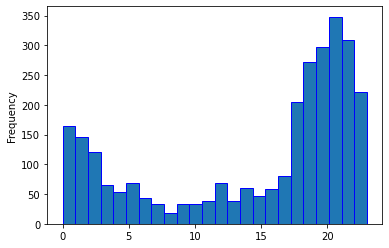

In [2]:
import pandas as pd
import datetime as dt

ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

# Top 3 colors
colors = ufo['Colors Reported'].value_counts().sort_values(ascending=False)
print(colors.iloc[0:3],"\n")

# Sightings by day_of_week?
dayNames=pd.DatetimeIndex(ufo['Time']).day_name().value_counts().sort_values(ascending=False)
print("Sightings by day_of_week:")
print(dayNames)
print("\nWhat day of the week has most sightings? Answer = ", dayNames.index[0], "\n")

# Histogram of hourly sightings on the top day 
topDayObservations=ufo[(pd.DatetimeIndex(ufo['Time']).day_name()==dayNames.index[0])]
topDayObservations['Time'].dt.hour.plot.hist(bins=24,ec='b')
max_hour=topDayObservations['Time'].dt.hour.value_counts().sort_values(ascending=False).index[0]
print("What time of day on that day of the week has most sightings? Answer = ", max_hour)

In [97]:
# Series
s1=pd.Series(data=[1,2,3,4])
s2=pd.Series(data=[1,2,3,4], index=['a','b','c','d'])
s3=pd.Series({'A':1,'B':2,'C':3,'D':4})
print(f" s1:\n{s1}\n\n s2:\n{s2}\n\n s3:\n{s3}")

 s1:
0    1
1    2
2    3
3    4
dtype: int64

 s2:
a    1
b    2
c    3
d    4
dtype: int64

 s3:
A    1
B    2
C    3
D    4
dtype: int64


In [98]:
# DataFrome creation from Series Objects
df=pd.concat([s1,s2,s3], axis=1)
df.columns=['s1','s2','s3']
df

s1   s2   s3
0  1.0  NaN  NaN
1  2.0  NaN  NaN
2  3.0  NaN  NaN
3  4.0  NaN  NaN
A  NaN  NaN  1.0
B  NaN  NaN  2.0
C  NaN  NaN  3.0
D  NaN  NaN  4.0
a  NaN  1.0  NaN
b  NaN  2.0  NaN
c  NaN  3.0  NaN
d  NaN  4.0  NaN

In [99]:
# reset_index()
s1.reset_index(drop=True, inplace=True)
s2.reset_index(drop=True, inplace=True)
s3.reset_index(drop=True, inplace=True)
df=pd.concat([s1,s2,s3], axis=1,ignore_index=True)
df.columns=['s1','s2','s3']
df

s1  s2  s3
0   1   1   1
1   2   2   2
2   3   3   3
3   4   4   4

In [100]:
# DataFrame creation from Dictionary
dic={'col1':[1,2,3,4], 'col2':['a','b','c','d']}
df=pd.DataFrame(dic)
df

col1 col2
0     1    a
1     2    b
2     3    c
3     4    d

In [101]:
# DataFrame creation from numpy
schema=['col1','col2']
instance=np.random.randint(1,4,size=(4,2))
print(instance)
df=pd.DataFrame(data=instance, columns=schema)
df

[[3 1]
 [2 2]
 [1 2]
 [3 2]]


col1  col2
0     3     1
1     2     2
2     1     2
3     3     2

In [102]:
# DataFrame to numpy
ndarr=df.to_numpy()
print(ndarr)

[[3 1]
 [2 2]
 [1 2]
 [3 2]]


In [81]:
# Importing/Exporting DataFrame from/to external storage
'''
pd.read_xxx() 
pd.to_xxx()
xxx: json, csv, html, excel, sql, etc
see https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html
'''

'\npd.read_xxx() \npd.to_xxx()\nxxx: json, csv, html, excel, sql, etc\nsee https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html\n'

In [103]:
df

col1  col2
0     3     1
1     2     2
2     1     2
3     3     2

In [104]:
# Adding a column

df['col3']=df['col1']+df['col2']
df['col4']=['a','b','c','d']
df

col1  col2  col3 col4
0     3     1     4    a
1     2     2     4    b
2     1     2     3    c
3     3     2     5    d

In [105]:
# Dropping a column

df.drop('col3',axis=1,inplace=True) # axis=1 (col drop by col name)
df.rename(columns={'col4':'letter'},inplace=True)
df

col1  col2 letter
0     3     1      a
1     2     2      b
2     1     2      c
3     3     2      d

In [106]:
# Adding a row

df=pd.concat([df,pd.DataFrame({'col1':3,'col2':3,'letter':'e'},index=[4])], axis=0)
df

col1  col2 letter
0     3     1      a
1     2     2      b
2     1     2      c
3     3     2      d
4     3     3      e

In [107]:
# Adding a row

df=df.append(pd.DataFrame({'col1':4,'col2':4,'letter':'f'},index=[5]))
df

col1  col2 letter
0     3     1      a
1     2     2      b
2     1     2      c
3     3     2      d
4     3     3      e
5     4     4      f

In [108]:
# Dropping a row

df.drop(0, inplace=True) # default axis=0 (row drop by index value)
df

col1  col2 letter
1     2     2      b
2     1     2      c
3     3     2      d
4     3     3      e
5     4     4      f

In [109]:
# Replacing index

df.set_index(pd.Index(['A','B','C','D','E']),inplace=True)
df

col1  col2 letter
A     2     2      b
B     1     2      c
C     3     2      d
D     3     3      e
E     4     4      f

In [110]:
# Replacing index

df.set_index(['letter'],inplace=True)
df

col1  col2
letter            
b          2     2
c          1     2
d          3     2
e          3     3
f          4     4

In [119]:
# Change the index names

df.index.names=['new name']
df.columns.names=['this']
df

this      col1  col2
new name            
b            2     2
c            1     2
d            3     2
e            3     3
f            4     4

In [121]:
gt20=[30,75.0,10,25.0,40,100]
lt20=[9,9.0,90,91.0,99,100]
nvr=[1,0.3,300,99.7,301,100]
ttl=[40,9.0,400,91.0,440,100]
cols=['N','%','N','%','N','%']
idx=['>20 Yrs','<20 Yrs','Never','Total']

multicol1 = pd.MultiIndex.from_tuples([('Nonmelanoma skin cancer', 'Yes', 'N'), 
                                       ('Nonmelanoma skin cancer', 'Yes', '%'), 
                                       ('Nonmelanoma skin cancer', 'No', 'N'), 
                                       ('Nonmelanoma skin cancer', 'No', '%'), 
                                       ('Nonmelanoma skin cancer', 'Total', 'N'), 
                                       ('Nonmelanoma skin cancer', 'Total', '%')], 
                                      names=['Title', 'Response', 'Result'])

multirow1 = pd.MultiIndex.from_tuples([('Sun', '>20 Yrs'), 
                                       ('Sun', '<20 Yrs'), 
                                       ('Sun', 'Never'), 
                                       ('Sun', 'Total')], 
                                      names=['Sun Exposure', 'Years'])

df = pd.DataFrame([gt20,lt20,nvr,ttl], index=multirow1, columns=multicol1)

df

Title                Nonmelanoma skin cancer                            
Response                                 Yes         No       Total     
Result                                     N     %    N     %     N    %
Sun Exposure Years                                                      
Sun          >20 Yrs                      30  75.0   10  25.0    40  100
             <20 Yrs                       9   9.0   90  91.0    99  100
             Never                         1   0.3  300  99.7   301  100
             Total                        40   9.0  400  91.0   440  100

In [123]:
df.loc[('Sun','Never'),('Nonmelanoma skin cancer', 'Yes', '%')] # select Series of the column

0.3

In [134]:
df.loc[('Sun','Never'),:]

Title                    Response  Result
Nonmelanoma skin cancer  Yes       N           1.0
                                   %           0.3
                         No        N         300.0
                                   %          99.7
                         Total     N         301.0
                                   %         100.0
Name: (Sun, Never), dtype: float64

In [135]:
df.loc[:,('Nonmelanoma skin cancer', 'Yes', '%')]

Sun Exposure  Years  
Sun           >20 Yrs    75.0
              <20 Yrs     9.0
              Never       0.3
              Total       9.0
Name: (Nonmelanoma skin cancer, Yes, %), dtype: float64

In [136]:
df[('Nonmelanoma skin cancer', 'Yes', '%')]

Sun Exposure  Years  
Sun           >20 Yrs    75.0
              <20 Yrs     9.0
              Never       0.3
              Total       9.0
Name: (Nonmelanoma skin cancer, Yes, %), dtype: float64

Multi-level DataFrame:
https://github.com/yumakemore/Multi-Level-DataFrames

